# Importing



In [131]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn import linear_model

import seaborn as sns

from scipy.stats import norm

from sklearn.model_selection import KFold

from sklearn.linear_model import BayesianRidge

In [132]:
df = pd.read_csv('house_price')

In [133]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [134]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [135]:
df[['HouseStyle','SalePrice']]

,HouseStyle,SalePrice
0,2Story,208500.0
1,1Story,181500.0
2,2Story,223500.0
3,2Story,140000.0
4,2Story,250000.0
...,...,...
2914,2Story,NaN
2915,2Story,NaN
2916,1Story,NaN
2917,SFoyer,NaN


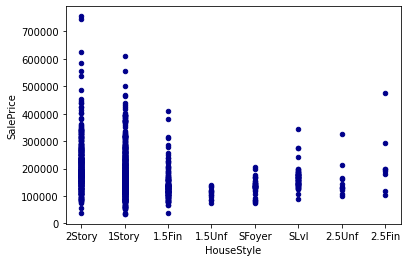

In [136]:
df.plot.scatter(x='HouseStyle', y='SalePrice', c='darkblue')
plt.show()

In [137]:
df[['LotFrontage', 'SalePrice']]

,LotFrontage,SalePrice
0,65.0,208500.0
1,80.0,181500.0
2,68.0,223500.0
3,60.0,140000.0
4,84.0,250000.0
...,...,...
2914,21.0,NaN
2915,21.0,NaN
2916,160.0,NaN
2917,62.0,NaN


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

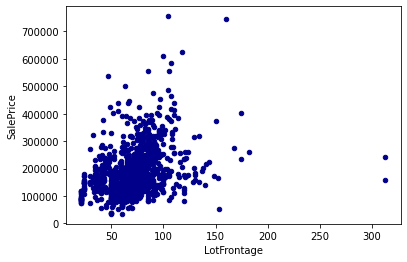

In [138]:
df.plot.scatter(x='LotFrontage', y='SalePrice', c='darkblue')

In [139]:
df[['LotArea', 'SalePrice']]

,LotArea,SalePrice
0,8450,208500.0
1,9600,181500.0
2,11250,223500.0
3,9550,140000.0
4,14260,250000.0
...,...,...
2914,1936,NaN
2915,1894,NaN
2916,20000,NaN
2917,10441,NaN


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

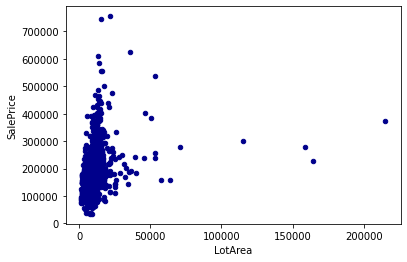

In [140]:
df.plot.scatter(x='LotArea', y='SalePrice', c='darkblue')

In [141]:
house_style = df['HouseStyle'].unique()
house_style

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [142]:
df_livingArea = df[['GrLivArea','SalePrice']]

In [143]:
df_livingArea = df_livingArea.dropna()

In [144]:
model = linear_model.LinearRegression()

In [145]:
X = df_livingArea['GrLivArea'].to_numpy().reshape(1460, 1)
y = df_livingArea['SalePrice'].to_numpy().reshape(1460, 1)

In [146]:
model.fit(X,y)

LinearRegression()

In [147]:
model.predict([[1000]])

array([[125699.38482231]])

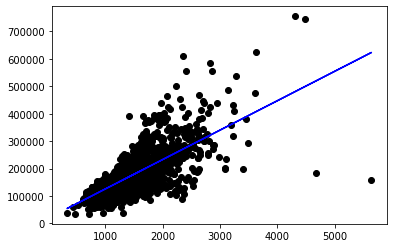

In [148]:
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="blue")

In [149]:
df_SF = df[['TotalBsmtSF','SalePrice']]
df_SF

,TotalBsmtSF,SalePrice
0,856.0,208500.0
1,1262.0,181500.0
2,920.0,223500.0
3,756.0,140000.0
4,1145.0,250000.0
...,...,...
2914,546.0,NaN
2915,546.0,NaN
2916,1224.0,NaN
2917,912.0,NaN


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

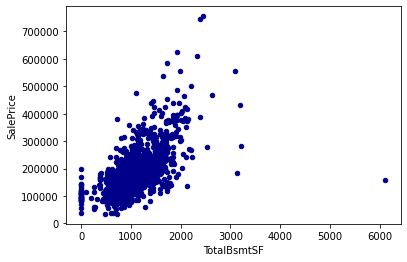

In [150]:
df_SF.plot.scatter(x= 'TotalBsmtSF',y='SalePrice',c = 'darkblue')

In [151]:
df_SF = df_SF.dropna()


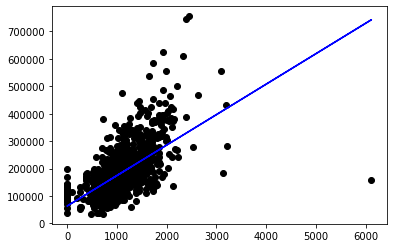

In [152]:
model = linear_model.LinearRegression()
X = df_SF['TotalBsmtSF'].to_numpy().reshape(1460,1)
y = df_SF['SalePrice'].to_numpy().reshape(1460,1)
model.fit(X,y)
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="blue")

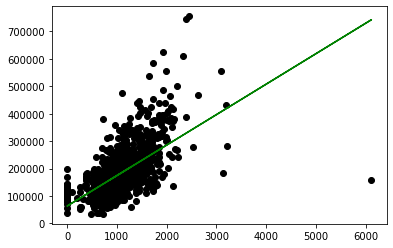

In [153]:
model = linear_model.Ridge(alpha=0.5)
X = df_SF['TotalBsmtSF'].to_numpy().reshape(1460,1)
y = df_SF['SalePrice'].to_numpy().reshape(1460,1)
model.fit(X,y)
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="green")

In [154]:
df_Quality = df[['OverallQual','SalePrice']]
df_Quality = df_Quality.dropna()
df_Quality

,OverallQual,SalePrice
0,7,208500.0
1,6,181500.0
2,7,223500.0
3,7,140000.0
4,8,250000.0
...,...,...
1455,6,175000.0
1456,6,210000.0
1457,7,266500.0
1458,5,142125.0


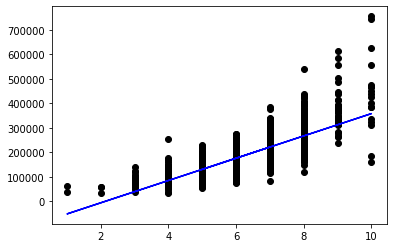

In [155]:
model = linear_model.LinearRegression()
X = df_Quality['OverallQual'].to_numpy().reshape(1460,1)
y = df_Quality['SalePrice'].to_numpy().reshape(1460,1)
model.fit(X,y)
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="blue")

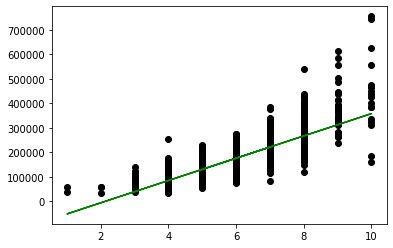

In [156]:
model = linear_model.Ridge(alpha=0.5)
X = df_Quality['OverallQual'].to_numpy().reshape(1460,1)
y = df_Quality['SalePrice'].to_numpy().reshape(1460,1)
model.fit(X,y)
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="green")


c:\users\67553\pycharmprojects\termproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


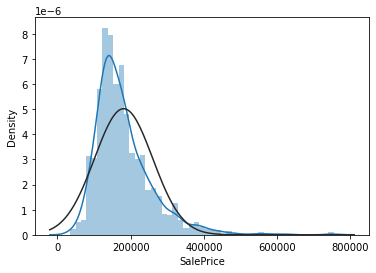

In [157]:
df['SalePrice'].describe()
sns.distplot(df['SalePrice'],fit=norm)
df

Show the None value in the data



In [158]:
df = df.dropna(subset=['SalePrice'])
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_precent = ((df.isnull().sum())/(df.isnull().count())).sort_values(ascending=False)
missing_type = df.dtypes
missing_all = pd.concat([missing_data,missing_precent,missing_type],axis=1,keys=['missing_data','missing_precent','missing_type'])
missing_all.drop(missing_all[missing_data==0].index,inplace=True)
missing_all.sort_values(by='missing_data',ascending=False)
missing_all

,missing_data,missing_precent,missing_type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageYrBlt,81,0.055479,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageFinish,81,0.055479,object


Delete the columns which includes more than 5 None values
Use get_dummies function to process the data

In [159]:
df.drop(missing_all[missing_data>5].index,axis=1,inplace=True)
df = pd.get_dummies(df,dummy_na=True)

df

C:\Users\67553\AppData\Local\Temp/ipykernel_3372/580573144.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(missing_all[missing_data>5].index,axis=1,inplace=True)
c:\users\67553\pycharmprojects\termproject\venv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,1,0,0,0,0,0,1,0,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,1,0,0,0,0,0,1,0,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,1,0,0,0,0,0,1,0,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,1,0,1,0,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0.0,953.0,...,0,1,0,0,0,0,0,1,0,0
1456,1457,20,13175,6,6,1978,1988,790.0,163.0,589.0,...,0,1,0,0,0,0,0,1,0,0
1457,1458,70,9042,7,9,1941,2006,275.0,0.0,877.0,...,0,1,0,0,0,0,0,1,0,0
1458,1459,20,9717,5,6,1950,1996,49.0,1029.0,0.0,...,0,1,0,0,0,0,0,1,0,0


Use KFold to split the data into train_data and test_data


In [160]:
kf = KFold(n_splits=5,shuffle=True)
result = next(kf.split(df), None)
train_data = df.iloc[result[0]]
test_data = df.iloc[result[1]]
train_data.reset_index(drop=True)
test_data.reset_index(drop=True)
train_data.to_csv('train_data',index = False)
test_data.to_csv('test_data', index = False)




In [161]:
train_data.isnull().sum()

Id                       0
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
SaleCondition_nan        0
Length: 250, dtype: int64

Use BayesianRidge model

In [162]:
model = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06)
X = train_data.drop(columns=['SalePrice'])
y = train_data.SalePrice.values



In [163]:
model.fit(X,y)
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)


BayesianRidge(normalize=False)

In [164]:
train_predict = model.predict(X)
train_predict

array([187327.96975045, 164255.95611892, 287580.05155743, ...,
       272494.51754272, 136860.89319217, 160657.98544419])

Use MAPE(mean absolute percentage error) to quantify how well the model performed


In [165]:
from sklearn.metrics import mean_absolute_percentage_error
mape_score = mean_absolute_percentage_error(train_data.SalePrice.values,train_predict)
mape_score

0.08996336103843619


show the train result

In [166]:


train_result=pd.DataFrame()
train_result['Id']=train_data['Id']
train_result['SalePrice']=train_data['SalePrice']
train_result['Predict_SalePrice']=train_predict

train_result

,Id,SalePrice,Predict_SalePrice
1,2,181500.0,187327.969750
3,4,140000.0,164255.956119
4,5,250000.0,287580.051557
6,7,307000.0,267470.420690
7,8,200000.0,224433.130551
...,...,...,...
1455,1456,175000.0,175051.254995
1456,1457,210000.0,214457.022760
1457,1458,266500.0,272494.517543
1458,1459,142125.0,136860.893192


Use the model to predict the test_data

In [167]:
test_predict = model.predict(test_data.drop(columns=['SalePrice']))
test_result=pd.DataFrame()
test_result['Id']=test_data['Id']
test_result['SalePrice']=test_data['SalePrice']
test_result['Predict_SalePrice']=test_predict
test_result

,Id,SalePrice,Predict_SalePrice
0,1,208500.0,216014.129876
2,3,223500.0,213596.194407
5,6,143000.0,181788.262161
10,11,129500.0,134495.664941
16,17,149000.0,164087.593000
...,...,...,...
1441,1442,149300.0,137136.527818
1444,1445,179600.0,186492.076487
1445,1446,129000.0,109023.776539
1449,1450,92000.0,99183.597068


show the difference between the predict price and the original price

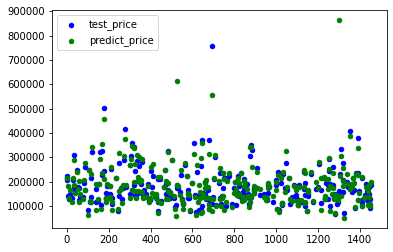

In [168]:
ax1 = plt.figure().add_subplot(111)
x = test_result['Id'].to_numpy().reshape(292,1)
y = test_result['SalePrice'].to_numpy().reshape(292,1)
ax1.scatter(x,y,s=20,color ='blue',label = 'test_price')
i = test_result['Id'].to_numpy().reshape(292,1)
j = test_result['Predict_SalePrice'].to_numpy().reshape(292,1)
ax1.scatter(i,j,s=20,color ='green',label = 'predict_price')
plt.legend()
plt.show()
